## Importing libraries

In [1]:
import pandas as pd
import numpy as np

## Importing the dataset

In [15]:
df = pd.read_csv(r"C:\Users\user\Desktop\pantech lite\4_SalaryEstimator_K-NearestNeighbour\salary.csv")
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


### Data Summary

In [16]:
df.shape

(32561, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Mapping the Salary data to BInary values

In [19]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)


In [20]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


## Defining X and Y variables

In [21]:
X = df.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [22]:
Y = df.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### Splitting Dataset into train and test data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1234)

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Finding the best K Value

Text(0, 0.5, 'Mean Error')

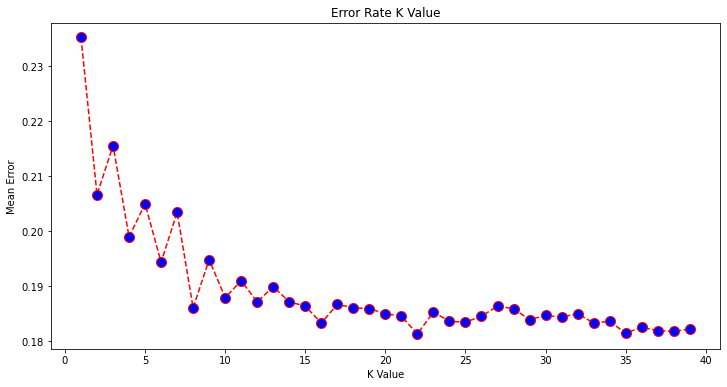

In [27]:
error = []

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for x values between 1 and 40

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    

plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle='dashed', marker = 'o',markerfacecolor = 'blue', markersize=10)
plt.title("Error Rate K Value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=22, metric='minkowski', p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=22)

### Predicting on new data

In [32]:
age = int(input('Enter the age : '))
edu = int(input('Enter employee education: '))
cg = int(input('Enter employee captain gain: '))
wh = int(input('Enter employee hours per week: '))
newEmp = [[age,edu,cg,wh]]

result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("The new employee might get salary above 50K")
else:
    print("The new employee might not get salary above 50K")

Enter the age : 68
Enter employee education: 9
Enter employee captain gain: 0
Enter employee hours per week: 40
[0]
The new employee might not get salary above 50K


### Predicting for all test data

In [34]:
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Evaluating the model

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuarcy of the model is : {0}%".format(accuracy_score(Y_test, Y_pred)*100))

Confusion Matrix: 
[[4699  262]
 [ 919  633]]
Accuarcy of the model is : 81.86703516044832%


### The accuracy of the model is 81.867